In [51]:
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from lightgbm import LGBMClassifier

In [52]:
df = pd.read_csv('train_data.csv')
df

,Sentence,Emotion
0,کی گفته مرد گریه نمیکنه!؟!؟ سیلم امشب سیل #اصفهان,SAD
1,عکسی که چند روز پیش گذاشته بودم این فیلم الانش...,OTHER
2,تنهاییم شبیه تنهاییه ظهرای بچگیم شده وقتی که ه...,SAD
3,خوبه تمام قسمت‌های گوشی رو محافظت می‌کنه,HAPPY
4,این خاک مال مردمان است نه حاکمان #ایران #مهسا_...,ANGRY
...,...,...
4919,من از بو و ماندگاریش راضی بودم ، قیمتش هم‌ مناسبه,HAPPY
4920,گاز نداریم آب نداریم برق نداریم نت نداریم پول ...,SAD
4921,یکی بهم گفت برنو چرا عاشق نمیشی گفتم ما پول عا...,SAD
4922,زیادی داریم به قضیه ی گاز میپردازیم فقط فراخوا...,OTHER


In [53]:
df.shape

(4924, 2)

In [54]:
df.isnull().sum()

Sentence    0
Emotion     0
dtype: int64

<AxesSubplot: >

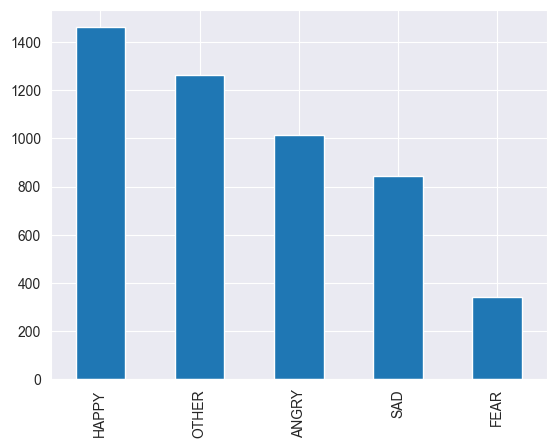

In [55]:
plot_df = df.Emotion.value_counts()
plot_df.plot(kind="bar")

In [56]:
uniqueChars = set(''.join(df['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

210
{'z', 'ᴇ', 'ش', 'آ', 'r', 'w', '‘', '6', 'د', 'ی', 'ل', '(', '.', ' ', 'B', '؟', '9', 'ɴ', '}', 'ح', 'U', '٢', 'ج', '♀', 'ʏ', '7', 's', 'ذ', 'ظ', 'Y', ',', ']', 'ء', '۸', '۰', '۳', 'T', 'D', '٬', 'ۀ', '،', 'M', '»', '✍', '0', '۴', 'y', 'ى', 'ٔ', '؛', 'E', '\u2069', 'ک', 'ت', '\u2066', 'ط', 'ز', '☹', '&', '2', 'ّ', 'ᴛ', '⭕', '_', ':', 'ᴏ', 'l', '⁉', '°', '=', '|', '%', '‐', 'Q', 'q', 'م', '/', 'َ', '-', '۹', 'ە', '’', '۵', '”', '⭐', 'x', '¹', '\u200d', '?', 'ي', '۱', 'ے', 'ا', '☄', '\n', '⛓', 'س', '٦', 'S', '٫', 'ق', '5', 'ټ', 'O', 'ژ', '⃟', 'G', 'J', '٪', '❤', '۲', 'm', 'W', 'گ', '+', 'P', 'ص', '♥', 'c', 'خ', 'ر', 'ه', 'a', '3', '۔', '!', '۶', '٠', '☝', 'f', '✅', 'C', '✨', 't', 'ب', '*', '⊰', '۷', '️', '☺', '٣', 'h', '\u200c', 'چ', 'ن', 'I', '⚘', '#', '☠', '²', 'ث', ')', 'پ', '☘', '4', '١', 'K', 'و', 'i', '«', 'e', '1', 'ُ', 'o', 'ْ', 'ؤ', 'ف', 'g', 'n', 'u', '⚽', 'ہ', 'R', 'v', 'ض', 'F', '✌', 'A', 'ك', 'j', '❄', '8', '^', 'ھ', 'غ', 'L', 'ِ', 'ة', 'k', 'H', 'ً', ';', 'b', '♂', 'p',

In [57]:
def normalize_persian(text):
    # Define a function to normalize Persian characters
    persian_digits = '۰۱۲۳۴۵۶۷۸۹٦'
    english_digits = '01234567896'
    yeh_characters = ['ی', 'ي', 'ے', 'ئ', 'ى']

    text = text.translate(str.maketrans(persian_digits, english_digits))
    for char in yeh_characters:
        text = text.replace(char, 'ی')

    return text

In [58]:
def preprocess_text(text):
    # Normalize Persian characters
    text = normalize_persian(text)

    # Convert to lowercase
    text = text.lower()

    # Add more preprocessing steps as needed

    return text

In [59]:
uniqueChars = set(''.join(df['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

210
{'z', 'ᴇ', 'ش', 'آ', 'r', 'w', '‘', '6', 'د', 'ی', 'ل', '(', '.', ' ', 'B', '؟', '9', 'ɴ', '}', 'ح', 'U', '٢', 'ج', '♀', 'ʏ', '7', 's', 'ذ', 'ظ', 'Y', ',', ']', 'ء', '۸', '۰', '۳', 'T', 'D', '٬', 'ۀ', '،', 'M', '»', '✍', '0', '۴', 'y', 'ى', 'ٔ', '؛', 'E', '\u2069', 'ک', 'ت', '\u2066', 'ط', 'ز', '☹', '&', '2', 'ّ', 'ᴛ', '⭕', '_', ':', 'ᴏ', 'l', '⁉', '°', '=', '|', '%', '‐', 'Q', 'q', 'م', '/', 'َ', '-', '۹', 'ە', '’', '۵', '”', '⭐', 'x', '¹', '\u200d', '?', 'ي', '۱', 'ے', 'ا', '☄', '\n', '⛓', 'س', '٦', 'S', '٫', 'ق', '5', 'ټ', 'O', 'ژ', '⃟', 'G', 'J', '٪', '❤', '۲', 'm', 'W', 'گ', '+', 'P', 'ص', '♥', 'c', 'خ', 'ر', 'ه', 'a', '3', '۔', '!', '۶', '٠', '☝', 'f', '✅', 'C', '✨', 't', 'ب', '*', '⊰', '۷', '️', '☺', '٣', 'h', '\u200c', 'چ', 'ن', 'I', '⚘', '#', '☠', '²', 'ث', ')', 'پ', '☘', '4', '١', 'K', 'و', 'i', '«', 'e', '1', 'ُ', 'o', 'ْ', 'ؤ', 'ف', 'g', 'n', 'u', '⚽', 'ہ', 'R', 'v', 'ض', 'F', '✌', 'A', 'ك', 'j', '❄', '8', '^', 'ھ', 'غ', 'L', 'ِ', 'ة', 'k', 'H', 'ً', ';', 'b', '♂', 'p',

In [60]:
# Preprocess the text data
df['Sentence'] = df['Sentence'].apply(preprocess_text)
encoder = OrdinalEncoder()
# Fit and transform the 'emotion' column
df['emotion'] = encoder.fit_transform(df[['Emotion']])

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Sentence'])
print(X_tfidf.shape)

(4924, 10159)


In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30, random_state=42)
X_tfidf = pca.fit_transform(X_tfidf)
print(X_tfidf.shape)

(4924, 30)


In [61]:
param_grids = {
    'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, None]},
}

In [62]:
for model_name, model_class in [
    ('Decision Tree', DecisionTreeClassifier),
]:
    print(f'Optimizing {model_name} model...')
    model = model_class()
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=['accuracy', 'f1_weighted'], refit='accuracy')
    grid_search.fit(X_tfidf, df['emotion'])

    #print(f'{model_name} - Best Accuracy: {grid_search.best_score_["accuracy"]:.2f}')
    #print(f'{model_name} - Best F1-score: {grid_search.best_score_["f1_weighted"]:.2f}')
    print(f'{model_name} - Best Hyperparameters: {grid_search.best_params_}')

Optimizing Decision Tree model...
Decision Tree - Best Hyperparameters: {'criterion': 'gini', 'max_depth': None}


In [65]:
from sklearn.metrics import accuracy_score, f1_score
model = DecisionTreeClassifier(criterion='gini', max_depth=15)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
f1_scores = []

for train_index, test_index in skf.split(X_tfidf, df['emotion']):
    X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = df['emotion'].iloc[train_index], df['emotion'].iloc[test_index]

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

print(f'Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.2f}')
print(f'Average F1-score: {sum(f1_scores) / len(f1_scores):.2f}')

Average Accuracy: 0.47
Average F1-score: 0.46


In [66]:
param_grids = {
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15, None]},
}

In [67]:
for model_name, model_class in [
    ('Random Forest', RandomForestClassifier),
]:
    print(f'Optimizing {model_name} model...')
    model = model_class()
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=['accuracy', 'f1_weighted'], refit='accuracy')
    grid_search.fit(X_tfidf, df['emotion'])

    #print(f'{model_name} - Best Accuracy: {grid_search.best_score_["accuracy"]:.2f}')
    #print(f'{model_name} - Best F1-score: {grid_search.best_score_["f1_weighted"]:.2f}')
    print(f'{model_name} - Best Hyperparameters: {grid_search.best_params_}')

Optimizing Random Forest model...
Random Forest - Best Hyperparameters: {'max_depth': None, 'n_estimators': 150}


In [69]:
from sklearn.metrics import accuracy_score, f1_score
model = RandomForestClassifier(n_estimators=150, max_depth=None)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
f1_scores = []

for train_index, test_index in skf.split(X_tfidf, df['emotion']):
    X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = df['emotion'].iloc[train_index], df['emotion'].iloc[test_index]

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

print(f'Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.2f}')
print(f'Average F1-score: {sum(f1_scores) / len(f1_scores):.2f}')

Average Accuracy: 0.59
Average F1-score: 0.58


In [70]:
param_grids = {
    'AdaBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.5, 1.0]},
}

In [71]:
for model_name, model_class in [
    ('AdaBoost', AdaBoostClassifier),
]:
    print(f'Optimizing {model_name} model...')
    model = model_class()
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=['accuracy', 'f1_weighted'], refit='accuracy')
    grid_search.fit(X_tfidf, df['emotion'])

    #print(f'{model_name} - Best Accuracy: {grid_search.best_score_["accuracy"]:.2f}')
    #print(f'{model_name} - Best F1-score: {grid_search.best_score_["f1_weighted"]:.2f}')
    print(f'{model_name} - Best Hyperparameters: {grid_search.best_params_}')

Optimizing AdaBoost model...


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

AdaBoost - Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 50}


In [72]:
from sklearn.metrics import accuracy_score, f1_score
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
f1_scores = []

for train_index, test_index in skf.split(X_tfidf, df['emotion']):
    X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = df['emotion'].iloc[train_index], df['emotion'].iloc[test_index]

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

print(f'Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.2f}')
print(f'Average F1-score: {sum(f1_scores) / len(f1_scores):.2f}')

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

Average Accuracy: 0.47
Average F1-score: 0.45


In [73]:
param_grids = {
    'Extra Tree': {'n_estimators': [50, 100, 150], 'criterion': ['gini', 'entropy']},
}

In [74]:
for model_name, model_class in [
    ('Extra Tree', ExtraTreesClassifier),
]:
    print(f'Optimizing {model_name} model...')
    model = model_class()
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=['accuracy', 'f1_weighted'], refit='accuracy')
    grid_search.fit(X_tfidf, df['emotion'])

    #print(f'{model_name} - Best Accuracy: {grid_search.best_score_["accuracy"]:.2f}')
    #print(f'{model_name} - Best F1-score: {grid_search.best_score_["f1_weighted"]:.2f}')
    print(f'{model_name} - Best Hyperparameters: {grid_search.best_params_}')

Optimizing Extra Tree model...
Extra Tree - Best Hyperparameters: {'criterion': 'entropy', 'n_estimators': 100}


In [75]:
from sklearn.metrics import accuracy_score, f1_score
model = ExtraTreesClassifier(criterion='entropy', n_estimators=100)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
f1_scores = []

for train_index, test_index in skf.split(X_tfidf, df['emotion']):
    X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = df['emotion'].iloc[train_index], df['emotion'].iloc[test_index]

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

print(f'Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.2f}')
print(f'Average F1-score: {sum(f1_scores) / len(f1_scores):.2f}')

Average Accuracy: 0.60
Average F1-score: 0.59


In [76]:
param_grids = {
    'LightGBM': {'num_leaves': [31, 63, 127], 'learning_rate': [0.1, 0.2, 0.3]}
}

In [77]:
for model_name, model_class in [
    ('LightGBM', LGBMClassifier)
]:
    print(f'Optimizing {model_name} model...')
    model = model_class()
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=['accuracy', 'f1_weighted'], refit='accuracy')
    grid_search.fit(X_tfidf, df['emotion'])

    #print(f'{model_name} - Best Accuracy: {grid_search.best_score_["accuracy"]:.2f}')
    #print(f'{model_name} - Best F1-score: {grid_search.best_score_["f1_weighted"]:.2f}')
    print(f'{model_name} - Best Hyperparameters: {grid_search.best_params_}')

Optimizing LightGBM model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7474
[LightGBM] [Info] Number of data points in the train set: 3939, number of used features: 317
[LightGBM] [Info] Start training from score -1.582883
[LightGBM] [Info] Start training from score -2.665554
[LightGBM] [Info] Start training from score -1.213923
[LightGBM] [Info] Start training from score -1.360977
[LightGBM] [Info] Start training from score -1.762489
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7514
[LightGBM] [Info] Number of data points in the train set: 3939, number of used features:

In [78]:
from sklearn.metrics import accuracy_score, f1_score
model = LGBMClassifier(learning_rate=0.1, num_leaves=31)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
f1_scores = []

for train_index, test_index in skf.split(X_tfidf, df['emotion']):
    X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = df['emotion'].iloc[train_index], df['emotion'].iloc[test_index]

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

print(f'Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.2f}')
print(f'Average F1-score: {sum(f1_scores) / len(f1_scores):.2f}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7474
[LightGBM] [Info] Number of data points in the train set: 3939, number of used features: 317
[LightGBM] [Info] Start training from score -1.582883
[LightGBM] [Info] Start training from score -2.665554
[LightGBM] [Info] Start training from score -1.213923
[LightGBM] [Info] Start training from score -1.360977
[LightGBM] [Info] Start training from score -1.762489
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7514
[LightGBM] [Info] Number of data points in the train set: 3939, number of used features: 318
[LightGBM] [Info] Start 

In [79]:
param_grids = {
    'XGBoost': {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.2, 0.3]},
}

In [80]:
for model_name, model_class in [
    ('XGBoost', XGBClassifier),
]:
    print(f'Optimizing {model_name} model...')
    model = model_class()
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=['accuracy', 'f1_weighted'], refit='accuracy')
    grid_search.fit(X_tfidf, df['emotion'])

    #print(f'{model_name} - Best Accuracy: {grid_search.best_score_["accuracy"]:.2f}')
    #print(f'{model_name} - Best F1-score: {grid_search.best_score_["f1_weighted"]:.2f}')
    print(f'{model_name} - Best Hyperparameters: {grid_search.best_params_}')

Optimizing XGBoost model...
XGBoost - Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 5}


In [81]:
from sklearn.metrics import accuracy_score, f1_score
model = XGBClassifier(learning_rate=0.3, max_depth=5)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
f1_scores = []

for train_index, test_index in skf.split(X_tfidf, df['emotion']):
    X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = df['emotion'].iloc[train_index], df['emotion'].iloc[test_index]

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

print(f'Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.2f}')
print(f'Average F1-score: {sum(f1_scores) / len(f1_scores):.2f}')

Average Accuracy: 0.60
Average F1-score: 0.60


In [46]:
param_grids = {
    'Gradient Boosting': {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.2, 0.3]},
}

In [47]:
for model_name, model_class in [
    ('Gradient Boosting', GradientBoostingClassifier),
]:
    print(f'Optimizing {model_name} model...')
    model = model_class()
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=['accuracy', 'f1_weighted'], refit='accuracy')
    grid_search.fit(X_tfidf, df['emotion'])

    #print(f'{model_name} - Best Accuracy: {grid_search.best_score_["accuracy"]:.2f}')
    #print(f'{model_name} - Best F1-score: {grid_search.best_score_["f1_weighted"]:.2f}')
    print(f'{model_name} - Best Hyperparameters: {grid_search.best_params_}')

Optimizing Gradient Boosting model...
Gradient Boosting - Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}


In [82]:
from sklearn.metrics import accuracy_score, f1_score
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
f1_scores = []

for train_index, test_index in skf.split(X_tfidf, df['emotion']):
    X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = df['emotion'].iloc[train_index], df['emotion'].iloc[test_index]

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

print(f'Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.2f}')
print(f'Average F1-score: {sum(f1_scores) / len(f1_scores):.2f}')

Average Accuracy: 0.58
Average F1-score: 0.58


In [83]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
f1_scores = []

for train_index, test_index in skf.split(X_tfidf, df['emotion']):
    X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = df['emotion'].iloc[train_index], df['emotion'].iloc[test_index]

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

print(f'Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.2f}')
print(f'Average F1-score: {sum(f1_scores) / len(f1_scores):.2f}')

Average Accuracy: 0.61
Average F1-score: 0.61


In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
model = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
f1_scores = []

for train_index, test_index in skf.split(X_tfidf, df['emotion']):
    X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = df['emotion'].iloc[train_index], df['emotion'].iloc[test_index]

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

print(f'Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.2f}')
print(f'Average F1-score: {sum(f1_scores) / len(f1_scores):.2f}')

Average Accuracy: 0.54
Average F1-score: 0.53
